# Generalisation, Underfitting and Overfitting

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score, mean_squared_error

Analyze data bankloan.csv  
Apply KNN Classifier  
target : default  
features : employ, debtinc, creddebt, othdebt  
Using different k (1,3,5,...100) : Apply scaling and Validate the model using accuracy in 20% testing data and 80% training data   

compare accuracies obtained from training data and testing data  


In [5]:
bankloan=pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [23]:
bankloan.shape

(700, 9)

In [8]:
X=bankloan[['employ','debtinc','creddebt','othdebt']]
y=bankloan['default']

## Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    test_size = 0.2, 
    random_state = 2020) 

## Scaling

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Selection Process Factor K

In [15]:
k= range(1,100,2)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train=knn.predict(X_train_scaled)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test=knn.predict(X_test_scaled)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score<acc_score:
        score=acc_score
        best_k=i


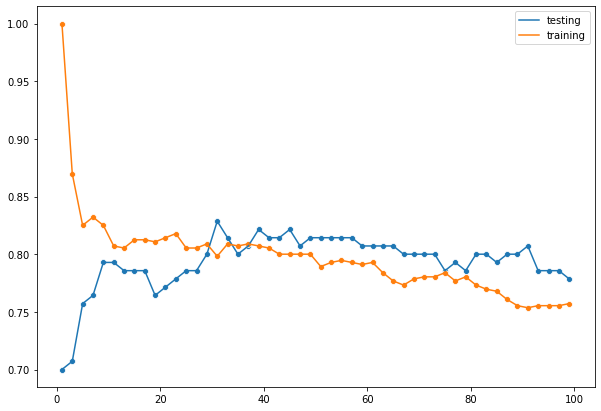

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [17]:
print('best k:', best_k,'\naccuracy:', score)

best k: 31 
accuracy: 0.8285714285714286


In [ ]:
Best factor k ada kasus ini adalah 31 dengan nilai akurasi 82.86%  
Untuk k=1, training set pada metode KNN mencari akurasi 100%, tapi memiliki testing score yang rendah --> overfitting

Pada K di bawah 31, ada kecenderungan model untuk ovefitting, sementara pada K di atas 31, ada kecenderungan underfitting (nilai akurasi testing maupun training menurun).

<hr>

# Model Complexity: Decision Tree

Analyze data bankloan.csv  
Apply Decision Tree Classifier  
target : default  
features : employ, debtinc, creddebt, othdebt  
Using different maximum depth of the tree (1,2,3,...25) : Validate the model using accuracy in 20% testing data and 80% training data  
compare accuracies obtained from training data and testing data  
you may try another hyperparameter such as minimum samples split, minimum samples leaf, etc.  


In [19]:
depth= range(1,25)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in depth:
    tree= DecisionTreeClassifier(max_depth=i, criterion='entropy')
    tree.fit(X_train,y_train)

    y_predict_train=tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test=tree.predict(X_test)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score<acc_score:
        score=acc_score
        best_depth=i


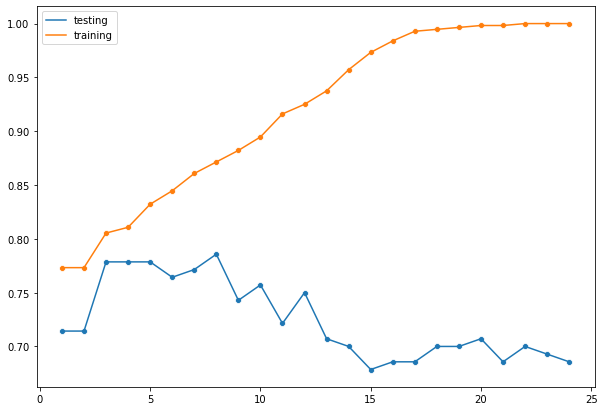

In [20]:
plt.figure(figsize=(10,7))
sns.lineplot(depth,testing_accuracy)
sns.scatterplot(depth,testing_accuracy)

sns.lineplot(depth,training_accuracy)
sns.scatterplot(depth,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [22]:
print('best depth:', best_depth,'\nscore:', score)

best depth: 8 
score: 0.7857142857142857


Dalam kasus ini max depth terbaik adalah 8, dengan nilai akurasi 78,57%  
Semakin tinggi max depth model kita, ada kecenderungan terjadi overfitting  
ketika max depth= 25, training_accuracy hampir mencapau 100%, sementara nilai akurasi testing jelek. 

try with another hyperparameter:  
* minimum samples split (2-200)
* minimum samples leaf (1-200)

tentukan nilai parameter terbaik, dan pada nilai parameter mana terjadi overfitting/underfiiting

In [25]:
split= range(2,200)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in split:
    tree= DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    tree.fit(X_train,y_train)

    y_predict_train=tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test=tree.predict(X_test)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score<acc_score:
        score=acc_score
        best_split=i

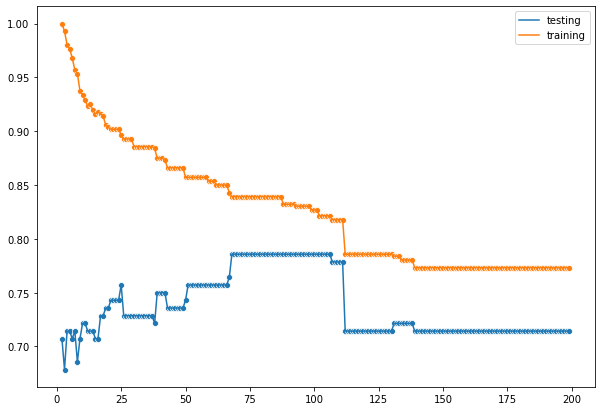

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(split,testing_accuracy)
sns.scatterplot(split,testing_accuracy)

sns.lineplot(split,training_accuracy)
sns.scatterplot(split,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [28]:
print('best split:', best_split,'\nscore:', score)

best split: 68 
score: 0.7857142857142857


In [32]:
leaf= range(1,200)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in leaf:
    tree= DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    tree.fit(X_train,y_train)

    y_predict_train=tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test=tree.predict(X_test)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score<acc_score:
        score=acc_score
        best_leaf=i

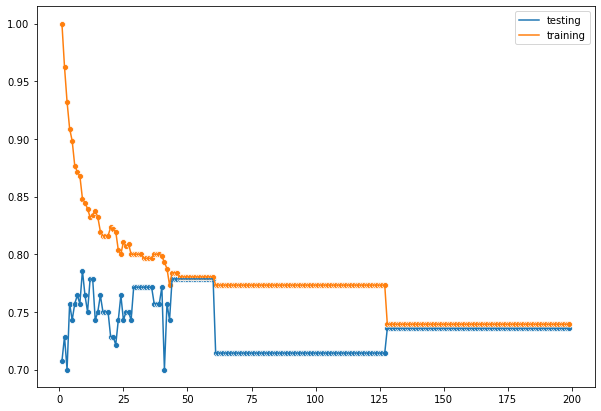

In [33]:
plt.figure(figsize=(10,7))
sns.lineplot(leaf,testing_accuracy)
sns.scatterplot(leaf,testing_accuracy)

sns.lineplot(leaf,training_accuracy)
sns.scatterplot(leaf,training_accuracy)

plt.legend(['testing','training'])
plt.show()

In [34]:
print('best leaf:', best_leaf,'\nscore:', score)

best leaf: 9 
score: 0.7857142857142857


In [ ]:
Tugas: coba pahami cara kerja parameter min_sample_split dan min_sample_leaf, kenapa ketika nilai parameter rendah, terjadi overfitting, dan kenapa ketika nilai parameter tinggi, terjadi underfitting.

# Model Complexity: Linear Model 

In [36]:
from sklearn.datasets import load_boston

In [37]:
boston=load_boston()

In [40]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
X=pd.DataFrame(data=boston['data'],columns=[boston['feature_names']])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
y=pd.Series(boston['target'])

In [46]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Data splitting

In [48]:
X_train, X_test, y_train, y_test= train_test_split(
    X,y,
    test_size=0.2,
    random_state=1899
)

## Ridge Regression

In [49]:
hyperparam=[100000,10000,1000,100,10,1,0.1,0.001]
training_mse=[]
testing_mse=[]
score=0

for i in range(len(hyperparam)):
    ridge=Ridge(alpha= hyperparam[i])
    ridge.fit(X_train,y_train)

    y_predict_train=ridge.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))

    y_predict_test=ridge.predict(X_test)
    mse_score=mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score=mse_score
        best_param=hyperparam[i]

    if score> mse_score:
        score=mse_score
        best_param=hyperparam[i]

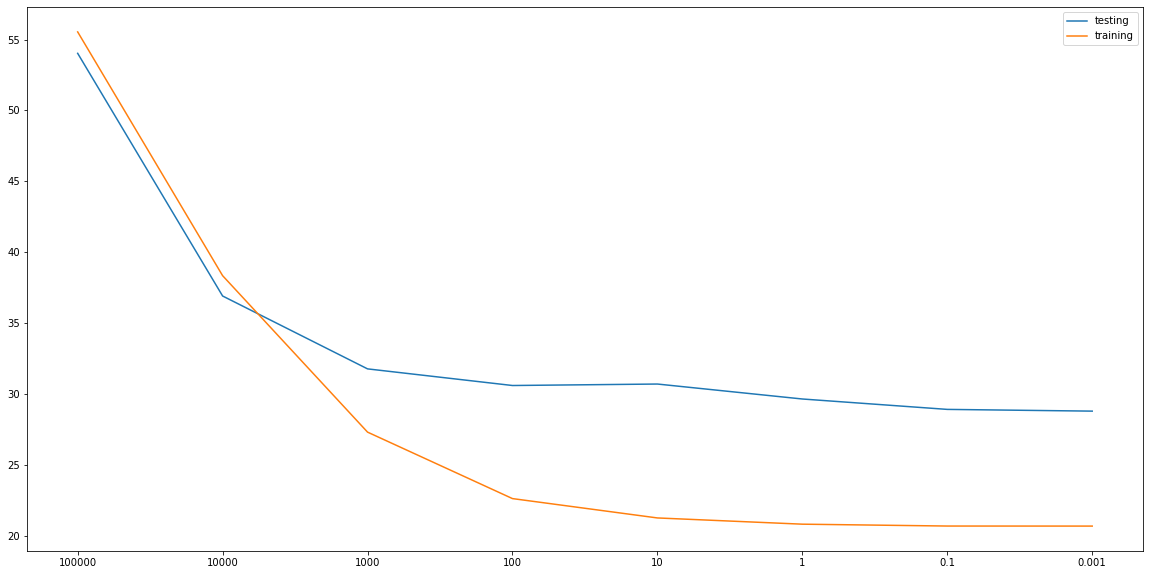

In [50]:
length=range(len(hyperparam))

plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)

plt.legend(['testing','training'])

plt.xticks(length,hyperparam)
plt.show()

In [51]:
print('best param:', best_param, '\nmse:', mse_score)

best param: 0.001 
mse: 28.778402778052975


In [53]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [86]:
ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001)

In [87]:
y_reg_train=ridge.predict(X_train)
y_reg_test=ridge.predict(X_test)

In [91]:
coef_ridge=pd.DataFrame({
    'feature_name':list(X),
    'feature_coef': ridge.coef_
})

In [93]:
coef_ridge

,feature_name,feature_coef
0,"(CRIM,)",-0.123098
1,"(ZN,)",0.027489
2,"(INDUS,)",0.040234
3,"(CHAS,)",1.676822
4,"(NOX,)",-14.800396
5,"(RM,)",4.324093
6,"(AGE,)",0.002115
7,"(DIS,)",-1.253837
8,"(RAD,)",0.328548
9,"(TAX,)",-0.014321


In [59]:
print('mse train',mean_squared_error(y_train,y_reg_train))
print('mse test',mean_squared_error(y_test,y_reg_test))

mse train 20.664301374310284
mse test 28.778402778052975


Ketika kita mamakai nilai alpha yang terlalu tinggi, maka terjadi underfitting, ditandai dengan nilai MSE baik train maupun test yang tinggi. Ini terjadi, karena nilai alpha tinggi memberi pinalti tinggi pada koefisien feature kita, berarti model kita menjadi terlalu simple  

ketika nilai alpha diturunkan, terlihat, baik nilai mse train dan test juga ikut berkurang, sampai akhirnya nilai mse train sedikit lebih rendah dari test.  

alpha terbaik dalam kasus ini adalah 0.001 dengan nilai mse 28.778

## lasso 

In [61]:
hyperparam=[100000,10000,1000,100,10,1,0.1,0.001]
training_mse=[]
testing_mse=[]
score=0

for i in range(len(hyperparam)):
    lasso=Lasso(alpha= hyperparam[i])
    lasso.fit(X_train,y_train)

    y_predict_train=lasso.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))

    y_predict_test=lasso.predict(X_test)
    mse_score=mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score=mse_score
        best_param=hyperparam[i]

    if score> mse_score:
        score=mse_score
        best_param=hyperparam[i]

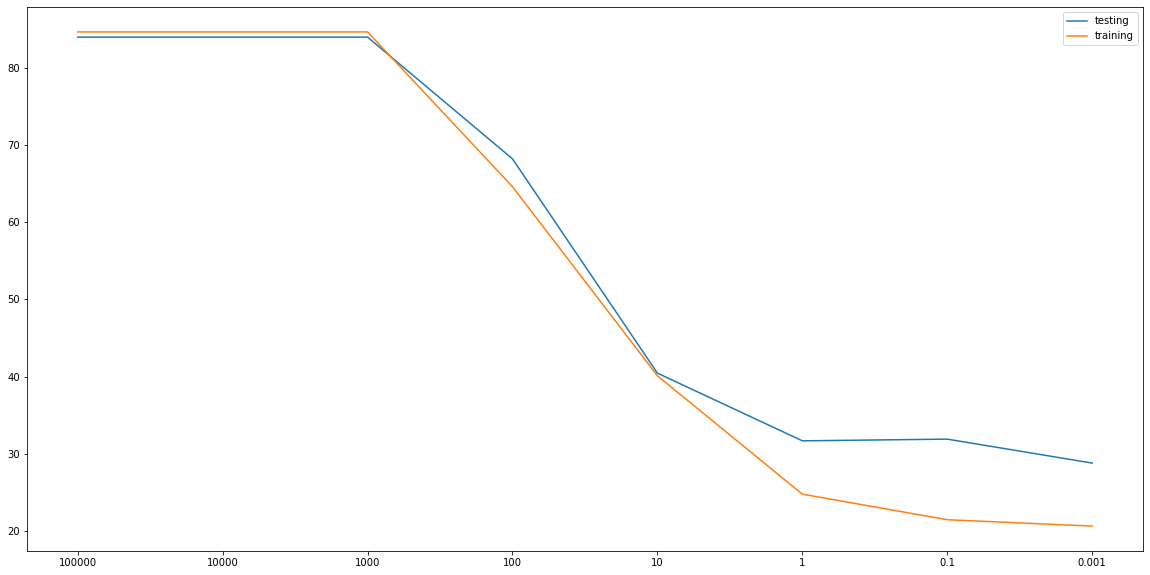

In [62]:
length=range(len(hyperparam))

plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)

plt.legend(['testing','training'])

plt.xticks(length,hyperparam)
plt.show()

In [ ]:
Ketika alpha terlalu tinggi, terjadi underfitting yang ditandai dengan tingginya nilai mse di data train dan test, karena banyaknya pinalti yang diberikan terhadap koefisien model, akibatnya, model menjadi terlalu simpel.

In [63]:
print('best param:', best_param, '\nmse:', mse_score)

best param: 0.001 
mse: 28.820511284098718


In [98]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [99]:
y_reg_train=lasso.predict(X_train)
y_reg_test=lasso.predict(X_test)

In [100]:
coef_lasso=pd.DataFrame({
    'feature_name':list(X),
    'feature_coef': lasso.coef_
})

In [101]:
coef_lasso

,feature_name,feature_coef
0,"(CRIM,)",-0.122920
1,"(ZN,)",0.027515
2,"(INDUS,)",0.038746
3,"(CHAS,)",1.655566
4,"(NOX,)",-14.470963
5,"(RM,)",4.324770
6,"(AGE,)",0.001868
7,"(DIS,)",-1.248666
8,"(RAD,)",0.327883
9,"(TAX,)",-0.014347


In [69]:
print('mse train',mean_squared_error(y_train,y_reg_train))
print('mse test',mean_squared_error(y_test,y_reg_test))

mse train 20.66467425317308
mse test 28.820511284098718
